# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Datasets

In [2]:
data_movies = pd.read_csv('movies.dat', delimiter = '::', names = ['Movie ID', 'Movie Title', 'Movie Genres'], encoding = 'latin-1')

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_18904\1438465019.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_movies = pd.read_csv('movies.dat', delimiter = '::', names = ['Movie ID', 'Movie Title', 'Movie Genres'], encoding = 'latin-1')


In [3]:
data_movies

,Movie ID,Movie Title,Movie Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
data_ratings = pd.read_csv("ratings.dat", sep = "::", header = None, names = ["User ID", "Movie ID", "Rating", "Timestamp"], encoding = 'latin-1')

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_18904\641571870.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_ratings = pd.read_csv("ratings.dat", sep = "::", header = None, names = ["User ID", "Movie ID", "Rating", "Timestamp"], encoding = 'latin-1')


In [5]:
data_ratings

,User ID,Movie ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
data_users = pd.read_csv("users.dat", sep = "::", header = None, names = ["User ID", "Gender", "Age", "Occupation", "ZipCode"], encoding = 'latin-1')

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_18904\3784963988.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_users = pd.read_csv("users.dat", sep = "::", header = None, names = ["User ID", "Gender", "Age", "Occupation", "ZipCode"], encoding = 'latin-1')


In [7]:
data_users

,User ID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


# Merge the Datasets

In [8]:
# Merge dataframes
data = pd.merge(pd.merge(data_movies,data_ratings), data_users)

In [9]:
data

,Movie ID,Movie Title,Movie Genres,User ID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


# Determine if ANY Value in a Series is Missing

In [10]:
data.isnull().values.any()

False

In [11]:
data.isnull().sum()

Movie ID        0
Movie Title     0
Movie Genres    0
User ID         0
Rating          0
Timestamp       0
Gender          0
Age             0
Occupation      0
ZipCode         0
dtype: int64

# Data Cleaning

In [12]:
data.drop(['Timestamp', 'ZipCode'], axis=1, inplace=True)  # Timestamp & Zip-Code is not needed
data.dropna(inplace=True)  # Remove rows with missing values

In [13]:
data

,Movie ID,Movie Title,Movie Genres,User ID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10
...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,M,25,4
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,M,25,4
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,M,25,4
1000207,3555,U-571 (2000),Action|Thriller,5727,3,M,25,4


# Data Visualization

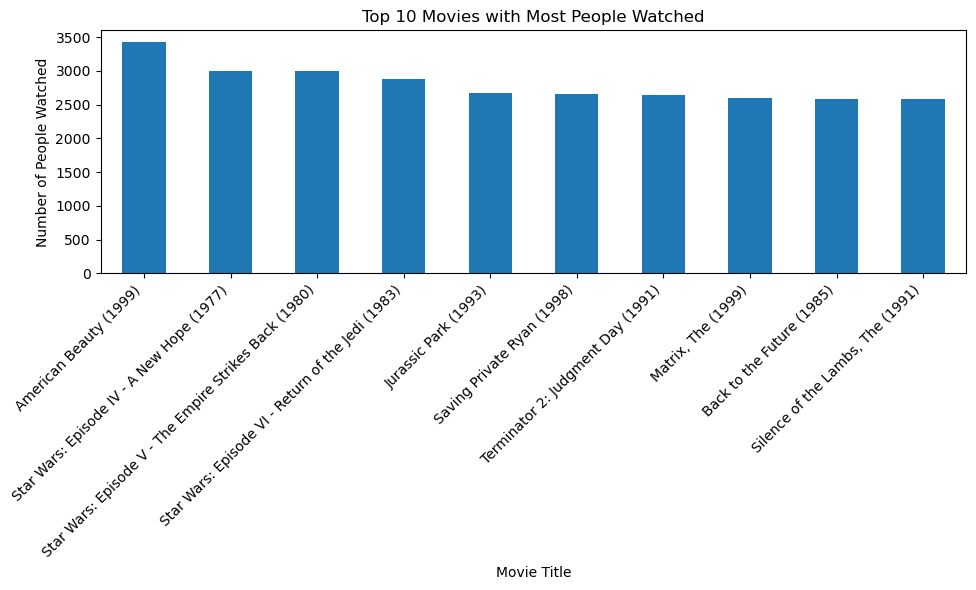

In [14]:
# Visualization 1: Top 10 movies with the most people watched
plt.figure(figsize=(10, 6)) 
top_rated_movies = data.groupby('Movie Title')['Rating'].count().sort_values(ascending=False).head(10)
top_rated_movies.plot(kind='bar')
plt.title('Top 10 Movies with Most People Watched')
plt.xlabel('Movie Title')
plt.ylabel('Number of People Watched')
plt.xticks(rotation=45, ha='right')  # Rotates the labels for better readability
plt.tight_layout()  # Helps in preventing label cutoffs and overlapping
plt.show()

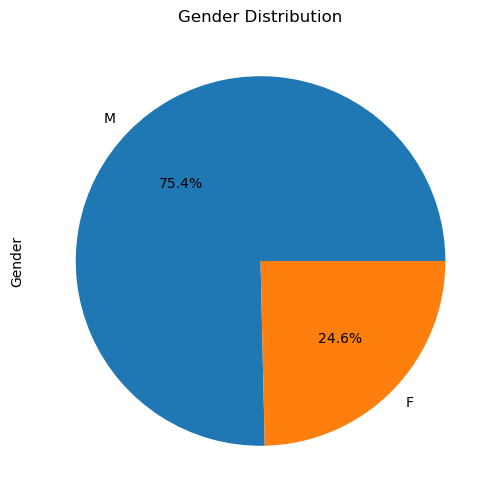

In [15]:
# Visualization 2: Gender Distribution
plt.figure(figsize=(6, 6))
data["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

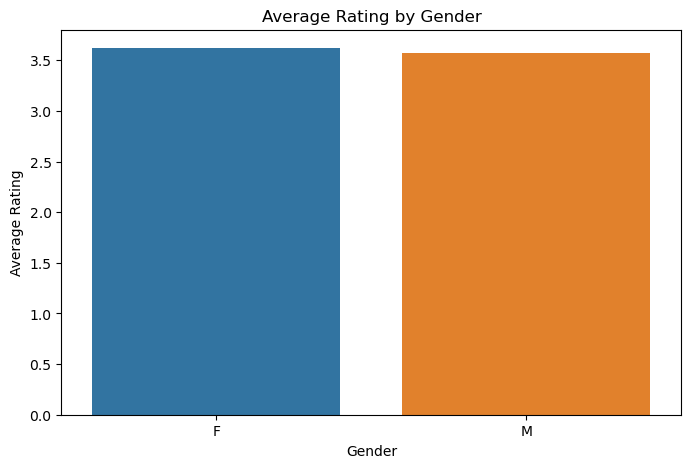

In [16]:
# Visualization 3: Average rating by gender
plt.figure(figsize = (8, 5))
Average_Rating_By_Gender = data.groupby("Gender")["Rating"].mean()
sns.barplot(x = Average_Rating_By_Gender.index, y = Average_Rating_By_Gender.values)
plt.title("Average Rating by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.show()

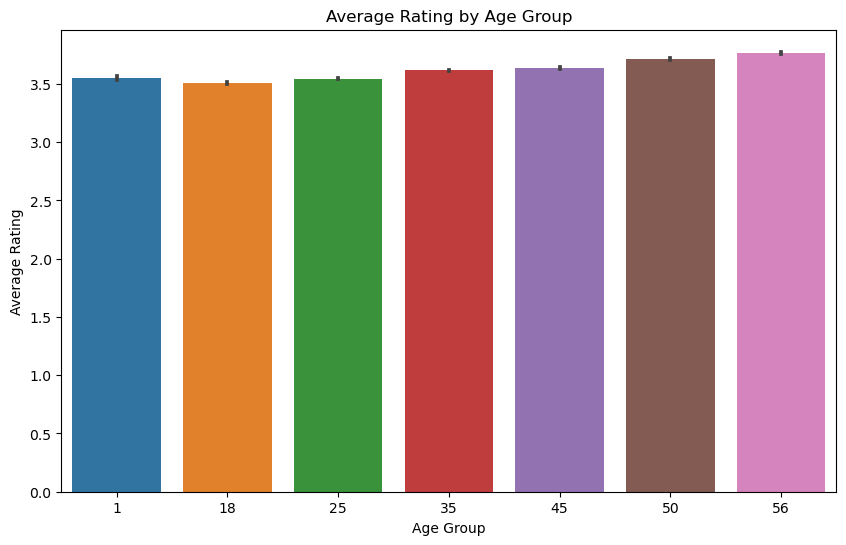

In [17]:
# Visualization 4: Barplot of Average Rating by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Age", y="Rating")
plt.title("Average Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.show()

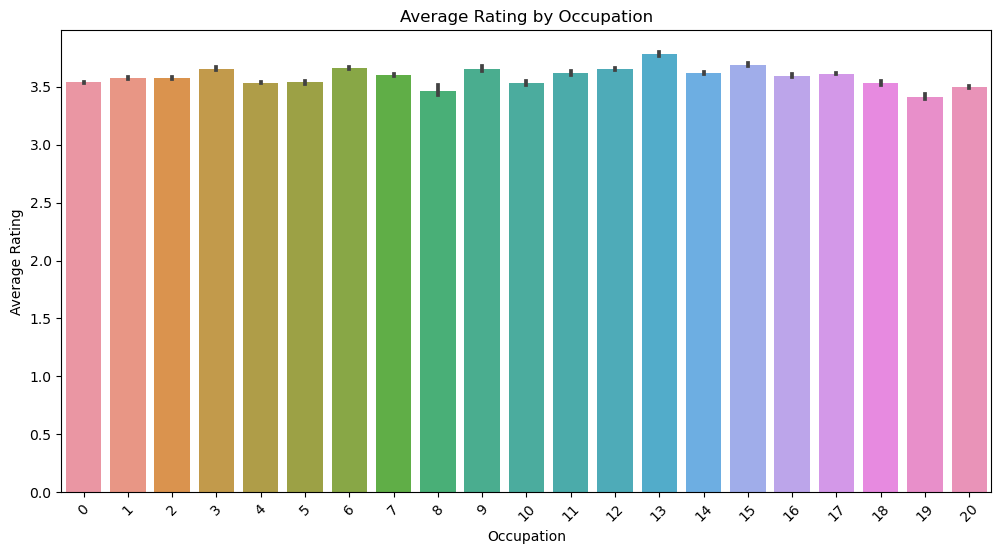

In [18]:
# Visualization 5: Rating Count by Occupation
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Occupation", y="Rating")
plt.title("Average Rating by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

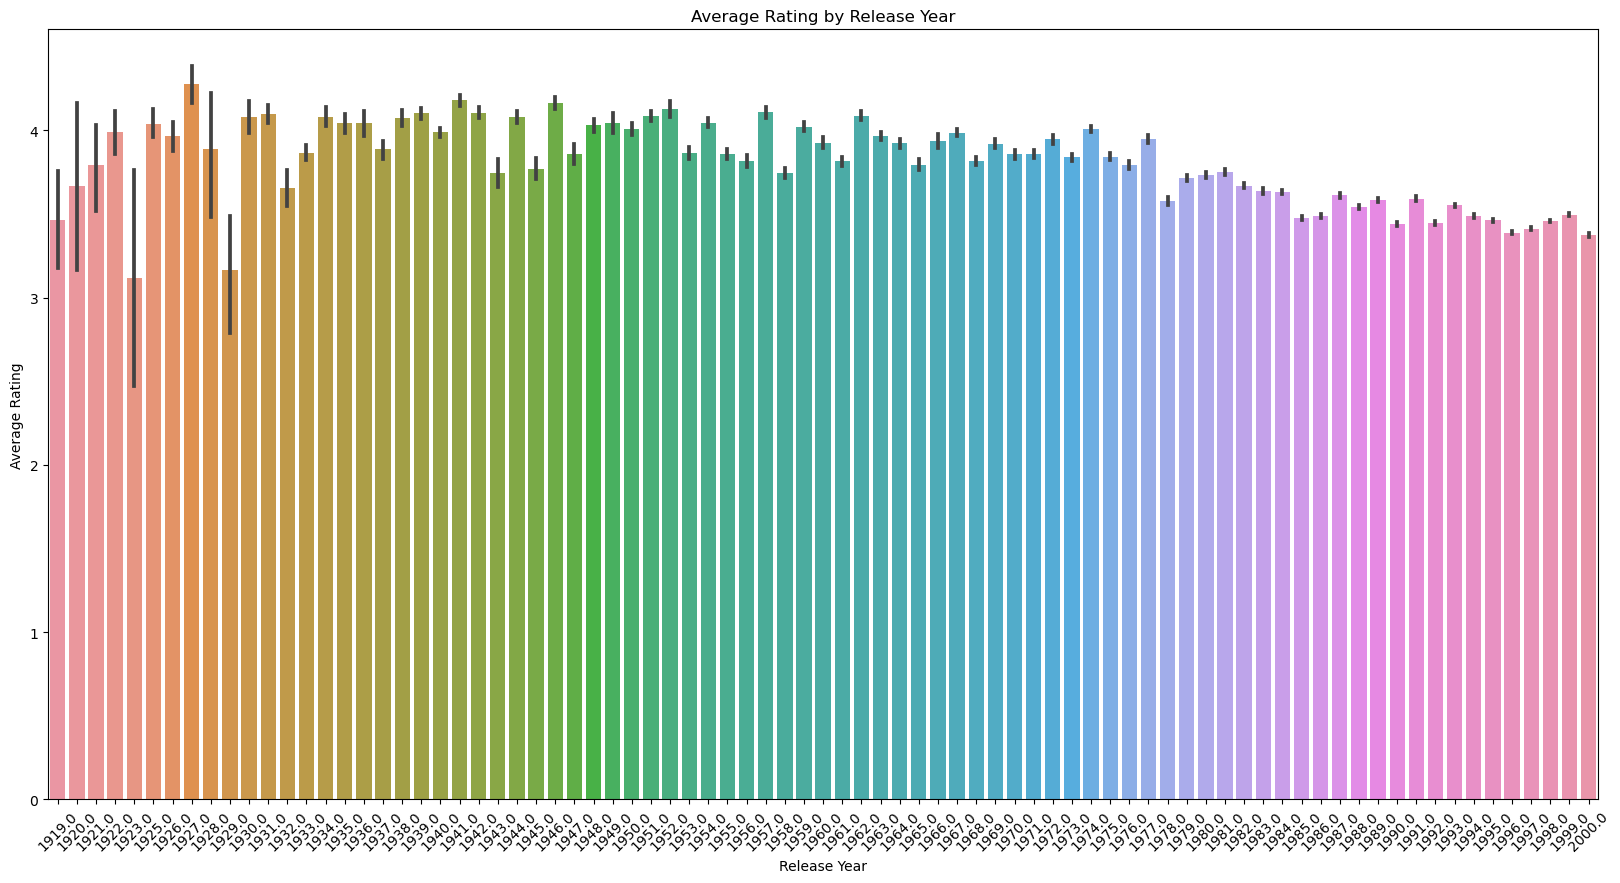

In [19]:
# Visualization 6: Average Rating by Release Year
plt.figure(figsize=(20, 10))
data["ReleaseYear"] = data["Movie Title"].str.extract(r'\((\d{4})\)').astype(float)
sns.barplot(data=data, x="ReleaseYear", y="Rating")
plt.title("Average Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

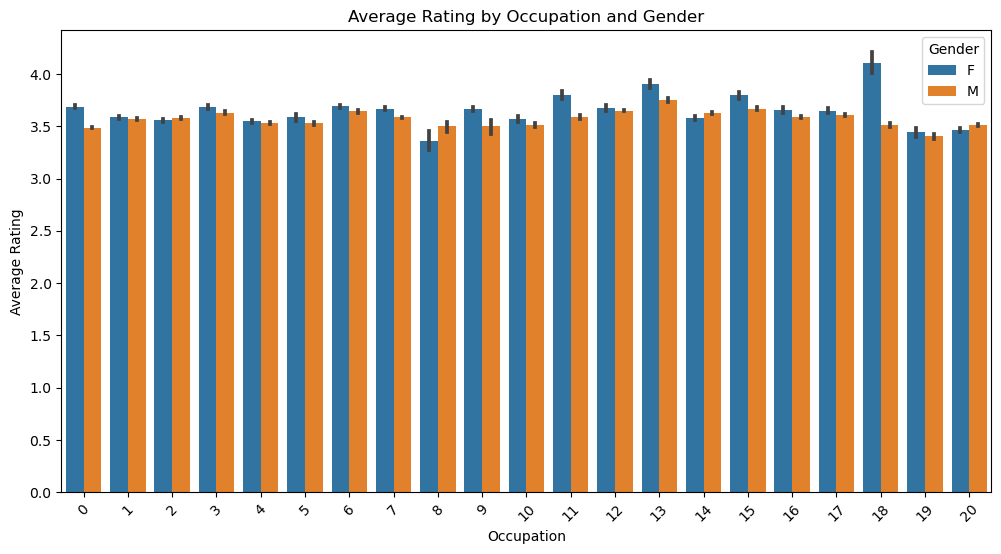

In [20]:
# Visualization 7: Average Rating by Occupation and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Occupation", y="Rating", hue="Gender")
plt.title("Average Rating by Occupation and Gender")
plt.xlabel("Occupation")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

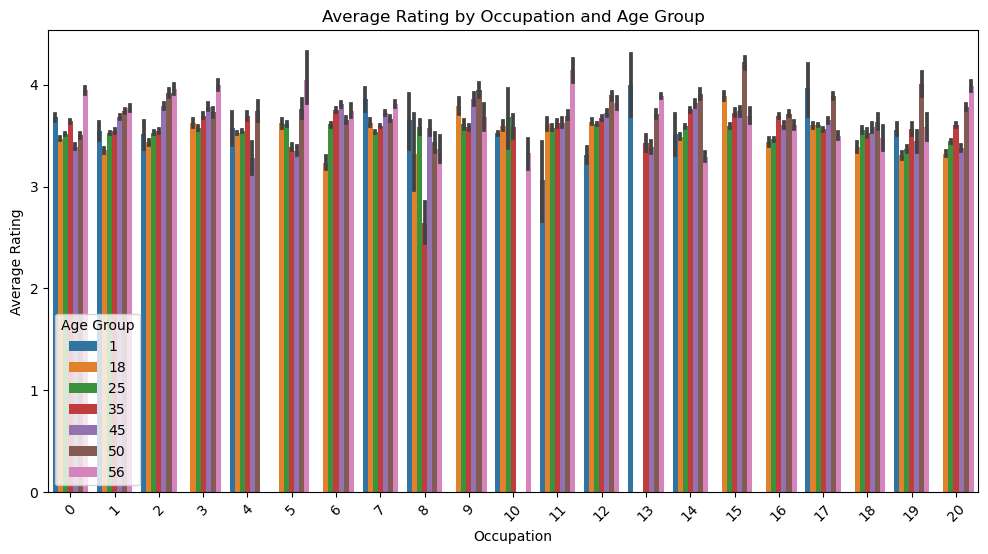

In [21]:
# Visualization 8: Barplot of Average Rating by Occupation and Age Group
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Occupation", y="Rating", hue="Age")
plt.title("Average Rating by Occupation and Age Group")
plt.xlabel("Occupation")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()

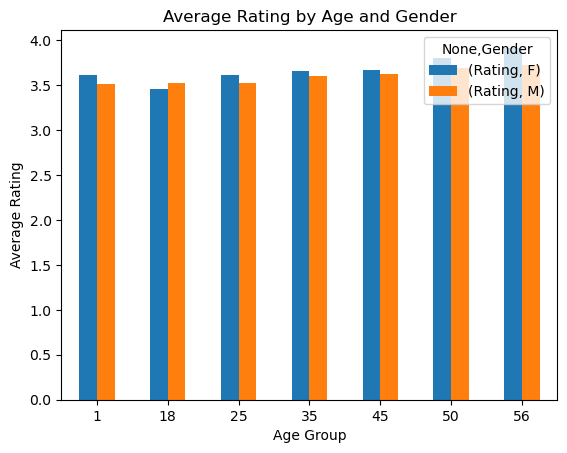

In [22]:
# Visualization 9: Average rating by user age and gender
age_gender_avg_ratings = data.groupby(['Age', 'Gender'])[['Rating']].mean().unstack()
age_gender_avg_ratings.plot(kind='bar')
plt.title('Average Rating by Age and Gender')
plt.ylabel('Average Rating')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()

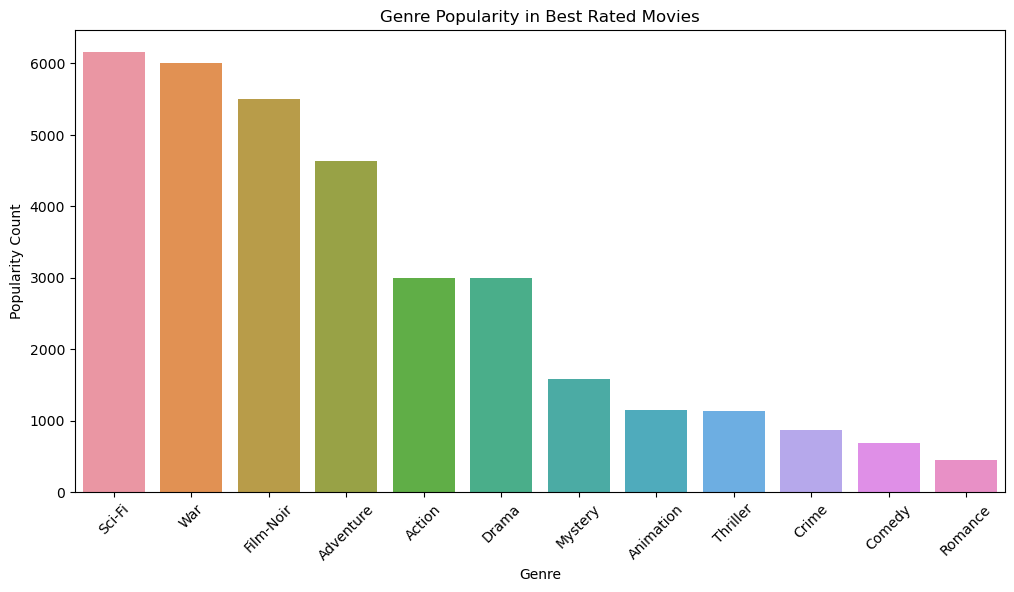

In [23]:
# Visualization 10: Genre counts by the highest rated movies
plt.figure(figsize=(12, 6))
genre_ratings = data.groupby('Movie Genres')['Rating'].mean().sort_values(ascending=False)
top_genre_ratings = genre_ratings[:10]
best_rated_genres = data[data['Movie Genres'].isin(top_genre_ratings.index)]
best_rated_genre_counts = best_rated_genres['Movie Genres'].str.split('|', expand=True).stack().value_counts()
sns.barplot(x=best_rated_genre_counts.index, y=best_rated_genre_counts.values)
plt.title("Genre Popularity in Best Rated Movies")
plt.xlabel("Genre")
plt.ylabel("Popularity Count")
plt.xticks(rotation=45)
plt.show()

<Figure size 3000x1000 with 0 Axes>

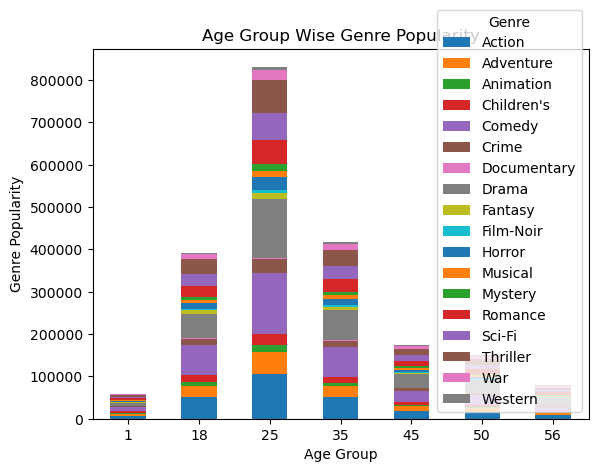

In [24]:
# Visualization 11: Genre counts by age group
plt.figure(figsize=(30, 10))
age_genre_counts = data.groupby(['Age'])['Movie Genres'].apply(lambda x: '|'.join(x)).reset_index()
age_genre_counts['Movie Genres'] = age_genre_counts['Movie Genres'].str.split('|')
age_genre_counts = age_genre_counts.explode('Movie Genres')
age_genre_pivot = age_genre_counts.pivot_table(index='Age', columns='Movie Genres', aggfunc='size', fill_value=0)
age_genre_pivot.plot(kind='bar', stacked=True)
plt.title("Age Group Wise Genre Popularity")
plt.xlabel("Age Group")
plt.ylabel("Genre Popularity")
plt.xticks(rotation=0)
plt.legend(title="Genre")
plt.show()

<Figure size 5000x2500 with 0 Axes>

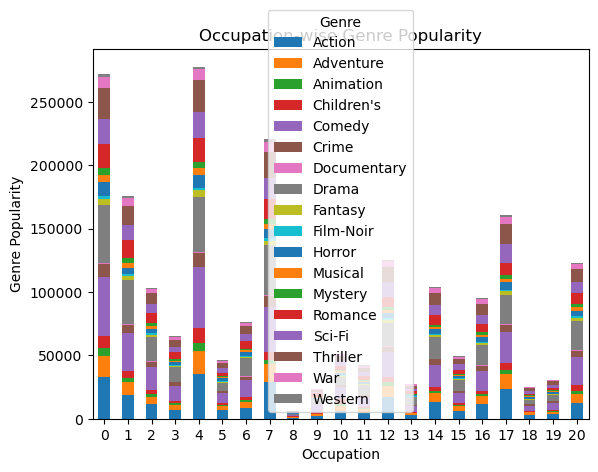

In [25]:
# Visualization 12: Genre counts by occupation
plt.figure(figsize=(50, 25))
occupation_genre_counts = data.groupby(['Occupation'])['Movie Genres'].apply(lambda x: '|'.join(x)).reset_index()
occupation_genre_counts['Movie Genres'] = occupation_genre_counts['Movie Genres'].str.split('|')
occupation_genre_counts = occupation_genre_counts.explode('Movie Genres')
occupation_genre_pivot = occupation_genre_counts.pivot_table(index='Occupation', columns='Movie Genres', aggfunc='size', fill_value=0)
occupation_genre_pivot.plot(kind='bar', stacked=True)
plt.title("Occupation-wise Genre Popularity")
plt.xlabel("Occupation")
plt.ylabel("Genre Popularity")
plt.xticks(rotation=0)
plt.legend(title="Genre")
plt.show()

# Feature Engineering

In [26]:
# Creating dummy variables for genres
genres = data['Movie Genres'].str.get_dummies('|')

# Concatenate dummy variables with the main dataset
data = pd.concat([data, genres], axis=1)

# Selecting features for the model
features = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Features and Target

In [27]:
# Define features (X) and target (Y)
X = data[features]
Y = data['Rating']

# Training and Testing the Dataset

In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression Classifier

In [29]:
# Building a Linear Regression model
model = LinearRegression()

# Train the Model

In [30]:
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

# Predictions on Test Data

In [31]:
# Making predictions on the test data
predictions = model.predict(X_test)

# Evaluate the Model

# Mean Squared Error of Linear Regression Classifier on Test Data

In [32]:
# Calculate Mean Squared Error
# Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a regression model. It measures the average of the squared differences between the predicted values and the actual values (ground truth) in a regression task. In other words, it quantifies how much the predictions deviate from the true values on average.
Mean_Squared_Error = mean_squared_error(Y_test, predictions)

In [33]:
print(f"Mean Squared Error of Linear Regression Classifier on Test Data: {Mean_Squared_Error}")

Mean Squared Error of Linear Regression Classifier on Test Data: 1.2047092033023412


# Root Mean Squared Error of Linear Regression Classifier on Test Data

In [34]:
# Calculate Root Mean Squared Error
# Root Mean Squared Error (RMSE) is a metric commonly used to measure the average magnitude of the errors between predicted values and actual values in a regression task. It's an extension of the Mean Squared Error (MSE), but the RMSE provides a more interpretable value because it's in the same unit as the original target variable
Root_Mean_Squared_Error = np.sqrt(mean_squared_error(Y_test, predictions))

In [35]:
print(f'Root Mean Squared Error of Linear Regression Classifier on Test Data: {Root_Mean_Squared_Error}')

Root Mean Squared Error of Linear Regression Classifier on Test Data: 1.0975924577466543


# Why We Used Mean Squared Error Instead Of Accuracy?

In [36]:
#In this movie rating prediction scenario, we're dealing with a regression problem, not a classification problem. The goal is to predict a continuous numerical value (movie rating) rather than a discrete label (e.g., positive/negative). Because of this, accuracy is not an appropriate metric for regression tasks. Instead, we use metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) to evaluate the performance of our regression model.